# Homework 22 Analysis of variance

**Замечание:** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [3]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код
# применим критерий Манна-Уитни (независимые выборки), примем уровень значимости 0,05
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Не отвергаем H0, различий в эффекте нет')
else:
    print('Отвергаем Н0, эффект различен')

Statistics=4343.000, p=0.054
Не отвергаем H0, различий в эффекте нет


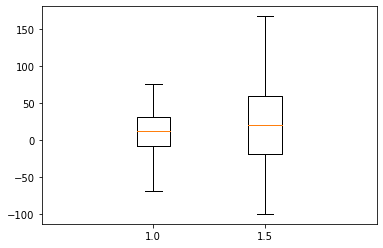

In [6]:
# не знаю, каким образом можно подтвердить эффект визуально, распределения в любом случае выглядят весьма похоже
plt.boxplot([A,B], positions=[1,1.5])
plt.show()

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [7]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код
# применим критерий Уилксона для зависимых выборок, примем уровень значимости равным 0,05
from scipy.stats import wilcoxon

stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Не отвергаем H0, различий в эффекте нет')
else:
    print('Отвергаем Н0, эффект различен')

Statistics=1930.000, p=0.041
Отвергаем Н0, эффект различен


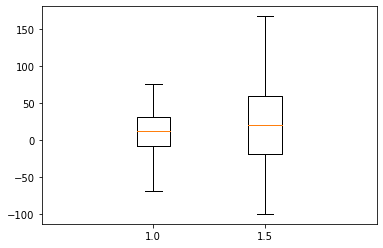

In [9]:
# аналогично, не представляю, каким образом можно подтвердить эффект визуально, распределения выглядят весьма похоже,
# несмотря на то, что тест показал обратное
plt.boxplot([A,B], positions=[1,1.5])
plt.show()

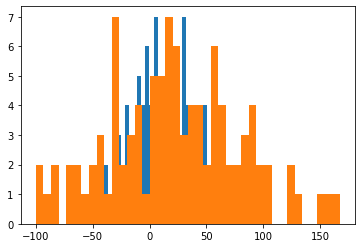

In [10]:
plt.hist(A, bins=40)
plt.hist(B, bins=40)
plt.show()

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [11]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код
# применим однофакторный дисперсионный анализ, положим уровень значимости равным 0,05
fvalue, pvalue = stats.f_oneway(water, nutri, mineral)
print(fvalue, pvalue)

alpha = 0.05
if pvalue > alpha:
    print('Принимаем H0, различий в эффекте нет')
else:
    print('Отвергаем Н0, эффект отличается, эксперимент удался')

12.525963044834192 2.9240047906326866e-05
Отвергаем Н0, эффект отличается, эксперимент удался


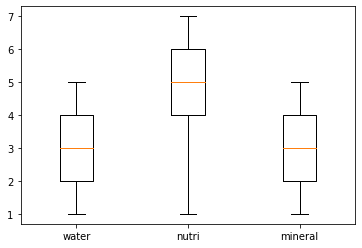

In [12]:
plt.boxplot([water, nutri, mineral])
plt.xticks([1, 2, 3], ['water', 'nutri', 'mineral'])
plt.show()
# видно, что среднее групп удобрений и минералки существенно отличаются, эффект выражен

# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=400></p>


# Данные A/B тестирования

In [13]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

`userid` - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

`sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки

`retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?

`retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиция для подтверждения ваших выводом. 
</div>

In [14]:
# Сгрупируем результаты теста по версиям игры
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [ ]:
# Ваши выводы
# Вывод: генератор псевдослучайных чисел отработал сносно, выборки практически равные :)

In [16]:
# Для начала посморим, влиял ли параметр version на удержание игроков, для этого сгруппируем по полям
# version и retention, объединим в один датасет
ds_1 = data.groupby(['version','retention_1']).count()['userid']
ds_1.index.rename(['version','retention'], inplace=True)
ds_2 = data.groupby(['version','retention_7']).count()['userid']
ds_2.index.rename(['version','retention'], inplace=True)
pool = pd.concat([ds_1, ds_2], axis=1, keys=['retention_1', 'retention_7'])

# Добавим столбцы с относительными величинами для упрощения анализа
pool.loc['gate_30', 'ret_1_%'] = pool.retention_1/pool.loc['gate_30', 'retention_1'].sum()
pool.loc['gate_30', 'ret_7_%'] = pool.retention_7/pool.loc['gate_30', 'retention_7'].sum()
pool.loc['gate_40', 'ret_1_%'] = pool.retention_1/pool.loc['gate_40', 'retention_1'].sum()
pool.loc['gate_40', 'ret_7_%'] = pool.retention_7/pool.loc['gate_40', 'retention_7'].sum()

pool.round(2)

retention_1  retention_7  ret_1_%  ret_7_%
version retention                                            
gate_30 False            24666        36198     0.55     0.81
        True             20034         8502     0.45     0.19
gate_40 False            25370        37210     0.56     0.82
        True             20119         8279     0.44     0.18

In [ ]:
# Заметим, что процент пользователей, вернувшихся к игре спустя и один, и семь дней незначительно, но выше для 
# версии игры с "воротами" на 30 уровне

In [ ]:
# Проанализируем также распределение величины sum_gamerounds; выдвинем предположение о том,
# что параметр version каким-то образом влияет на рапределение этой величины

In [17]:
# разделяем множество на два
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']

In [18]:
# применим критерий Манна-Уитни для независимых выборок, примем уровень значимости 0,05
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(v_30['sum_gamerounds'], v_40['sum_gamerounds']) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принимаем H0, различий нет')
else:
    print('Отвергаем Н0, разница между распределениями статистически значима')

Statistics=1009027049.500, p=0.025
Отвергаем Н0, разница между распределениями статистически значима


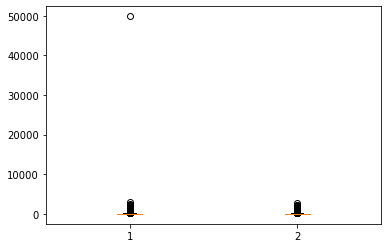

In [19]:
# супер, какой-то эффект при выбранном уровне значимости эксперимент дал; взглянем на боксплоты
plt.boxplot([v_30['sum_gamerounds'],v_40['sum_gamerounds']])
plt.show()

In [20]:
# видим, что в данных есть выброс
v_30.loc[v_30.sum_gamerounds > 20000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [22]:
# уберем это значение из анализа и вновь взглянем на визуализацию
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 20000].index)

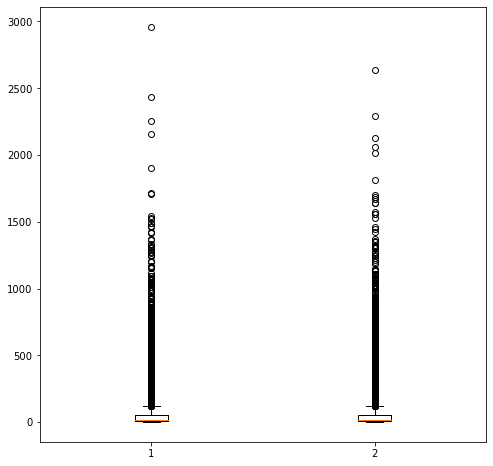

In [23]:
plt.figure(figsize=(8, 8))
plt.boxplot([v_30['sum_gamerounds'],v_40['sum_gamerounds']])
plt.show()

In [24]:
# видно, что sum_gamerounds для большей части игроков не превышает значения 100-200; отбросим значения выше
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

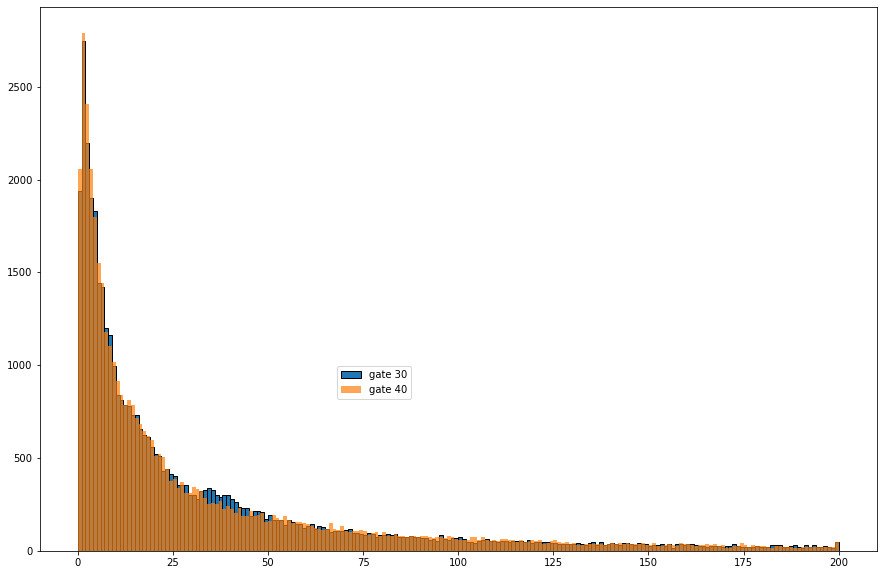

In [28]:
#посмотрим на гистограмму
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

In [ ]:
# Итак, сделать однозначный вывод по данной визуализации непросто, распределения весьма схожи;
# тем не менее, можно отметить, что для gate_30 доля игроков, имеющих от 30 до 50 игровых раундов, превосходит
# таковую для gate_40, в то время как доля игроков, проводящих в игре от 1 до 6 раундов больше для gate_40;
# вкупе с результатами, полученным после анализа удержания игроков (доля положительных retention_7 больше для gate_30),
# делаем вывод, что размещать "ворота" целесообразнее на уровне 30